In [112]:
# Heart Disease Project Gender Analysis
# Jae H. Cho
# April 9, 2019

# Import necessary libraries

import os
import pandas as pd
import numpy as np

# Plot Analysis

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(color_codes=True)

from matplotlib import rcParams
from matplotlib.cm import rainbow

from scipy.stats import pearsonr

# df['class'].value_counts().plot('bar')

In [113]:
#Load the heart.csv data file
pd.set_option('display.max_rows', None)
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [114]:
#Observe the first top 5 default rows of the heart disease data

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [116]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [117]:
#Observe to see if there are any null values necessary to impute or leave out.

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [118]:
data.isnull().values.any()

False

In [119]:
data.isnull().sum().sum()

0

In [120]:
#Display the overall structure of data (rows,columns)

data.shape

(303, 14)

In [121]:
data.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [122]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 14)


In [123]:
#We can see there are a total of 303 observations and 14 variables in the provided data set
#Lets observe some more feature statistics

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [124]:
corr = data.corr()['target'].abs().sort_values()
corr

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64

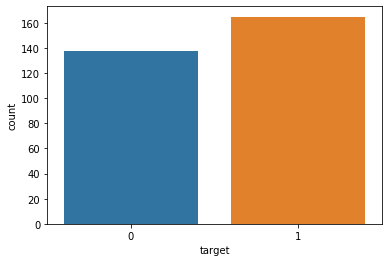

In [181]:
sns.countplot(data.target)
plt.show()

In [126]:
# Lets observe sex from those who have the 'target' disease and those whom do not for males and females
# Credit to Zhenhui Xie for comparison function

def sideplot(data, col, kind="bar", title = None):
    assert kind in ["bar", "hist"]
    fig = plt.figure(figsize=(10, 6))
    if kind == "bar":
        ax1 = plt.subplot(2, 2, 1)
        data[data.target == 1][['target', col]].groupby(col).count().plot(kind='bar', rot = 0, legend = False, ax = ax1, color = "r")
        ax2 = plt.subplot(2, 2, 2)
        data[data.target == 0][['target', col]].groupby(col).count().plot(kind='bar', rot = 0, legend = False, ax = ax2, color = "b")
    else:
        ax1 = plt.subplot(2, 2, 1)
        plt.hist(data[data.target == 1][col], color = "b")
        plt.xlabel(col)
        ax2 = plt.subplot(2, 2, 2)
        plt.hist(data[data.target == 0][col], color = "b")
        plt.xlabel(col)
    # Re-adjusting
    ylim = (0, max(ax1.get_ylim()[1], ax2.get_ylim()[1]))
    ax1.set_ylim(ylim)
    ax2.set_ylim(ylim)
    xlim = (min(ax1.get_xlim()[0], ax2.get_xlim()[0]), max(ax1.get_xlim()[1], ax2.get_xlim()[1]))
    ax1.set_xlim(xlim)
    ax2.set_xlim(xlim)
    if title is not None:
        fig.suptitle(title)

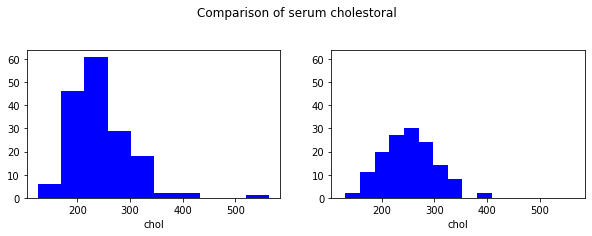

In [127]:
sideplot(data, "chol", kind = "hist", title = "Comparison of serum cholestoral")

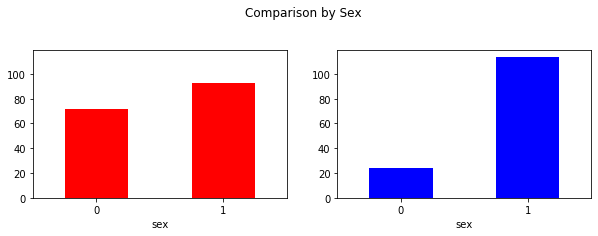

In [128]:
#For the variable sex(1 = male; 0 = female)

sideplot(data, "sex", kind = "bar", title = "Comparison by Sex")
plt.show()

In [129]:
# data['sex'][data['sex'] == 0] = 'female'
# data['sex'][data['sex'] == 1] = 'male'
# It seems there are more males than females in both cases of those who don't have heart disease and those that do 
# have heart disease. 

In [130]:
data.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1


In [131]:
total_genders_count=len(data.sex)
male_count=len(data[data['sex']==1])
female_count=len(data[data['sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


In [132]:
#Lets now separate the data into males and females
female_data = data[data['sex'] == False]
male_data = data[data['sex'] == True]

In [133]:
female_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1


In [134]:
male_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1


In [135]:
# Let's create a separate list of values for categorical versus quantitative data.

categorical_val = []             # categorical data
continous_val = []               # quantitative data

for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [136]:
# Let's view our categorical values.

categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [137]:
# After carefully observing the data, I found that it was neccessary to change some categorical variables to 
# dummy variables and scale all the values before training the Machine Learning models. First, I'll use the command
# "get_dummies," to create dummy columns for the categorical variables.

In [138]:
categorical_val.remove('target')

In [139]:
# categorical_val.remove('target')
# dataset = pd.get_dummies(df, columns = categorical_val)
# from sklearn.model_selection import train_test_split

# X = dataset.drop('target', axis=1)
# y = dataset.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
dataset = pd.get_dummies(data, columns = categorical_val)

In [141]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [143]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 86.54%
			Recall Score: 90.00%
			F1 score: 88.24%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [146]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

data_results = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
data_results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187


In [147]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.40%
_______________________________________________
Classification Report:	Precision Score: 93.16%
			Recall Score: 94.78%
			F1 score: 93.97%
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
Classification Report:	Precision Score: 89.80%
			Recall Score: 88.00%
			F1 score: 88.89%
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



In [149]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = data_results.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187
1,Support Vector Machine,93.396226,87.912088


In [180]:
#knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_val = []
# for k in range (1,21):
    # knn_classifier = KNeighborsClassifier(n_neighbors = k)
    # score = cross_val_score(knn_classifier,X,y,cv=12)
    # knn_val.append(score.mean())

knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8448387096774195

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc = RandomForestClassifier(n_estimators=12)
score = cross_val_score(rfc, X, y, cv=12)

In [152]:
score.mean()

0.8384615384615386

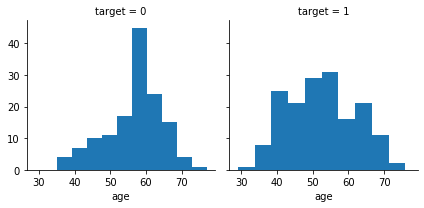

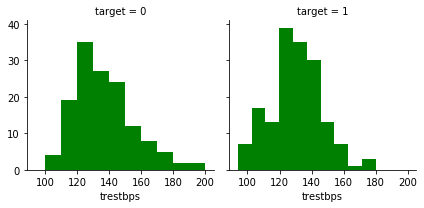

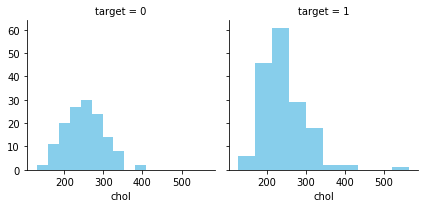

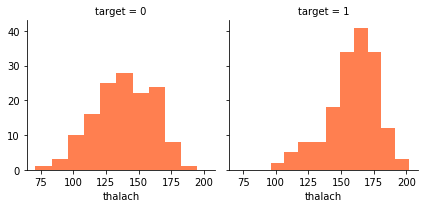

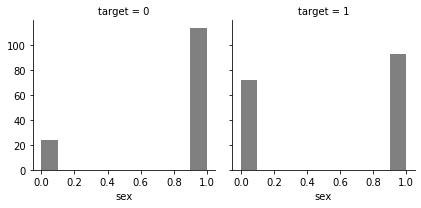

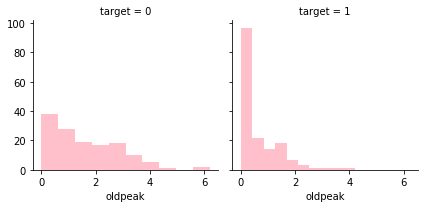

In [184]:
g = sns.FacetGrid(data, col='target')
g.map(plt.hist, 'age', bins=10)

g2 = sns.FacetGrid(data, col='target')
g2.map(plt.hist, 'trestbps', bins=10, color = "green")

g3 = sns.FacetGrid(data, col='target')
g3.map(plt.hist, 'chol', bins=10, color = "skyblue")

g4 = sns.FacetGrid(data, col='target')
g4.map(plt.hist, 'thalach', bins=10, color = "coral")

g5 = sns.FacetGrid(data, col='target')
g5.map(plt.hist, 'sex', bins=10, color = "gray")

g5 = sns.FacetGrid(data, col='target')
g5.map(plt.hist, 'oldpeak', bins=10, color = "pink")


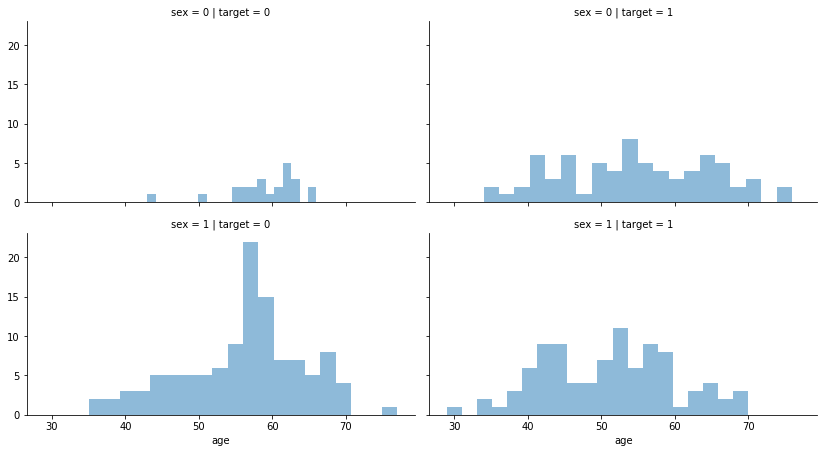

In [154]:
grid = sns.FacetGrid(data, col='target', row='sex', height=3.2, aspect=1.8)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [155]:
corr, _ = pearsonr(data['age'], data['chol'])
print('Pearsons correlation for age and chol: %.3f' % corr)

corr, _ = pearsonr(data['age'], data['trestbps'])
print('Pearsons correlation for trestbps and age: %.3f' % corr)

corr, _ = pearsonr(data['trestbps'], data['chol'])
print('Pearsons correlation for trestbps and chol: %.3f' % corr)

corr, _ = pearsonr(data['thalach'], data['oldpeak'])
print('Pearsons correlation for thalach and oldpeak: %.3f' % corr)

Pearsons correlation for age and chol: 0.214
Pearsons correlation for trestbps and age: 0.279
Pearsons correlation for trestbps and chol: 0.123
Pearsons correlation for thalach and oldpeak: -0.344


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a34942890>]],
      dtype=object)

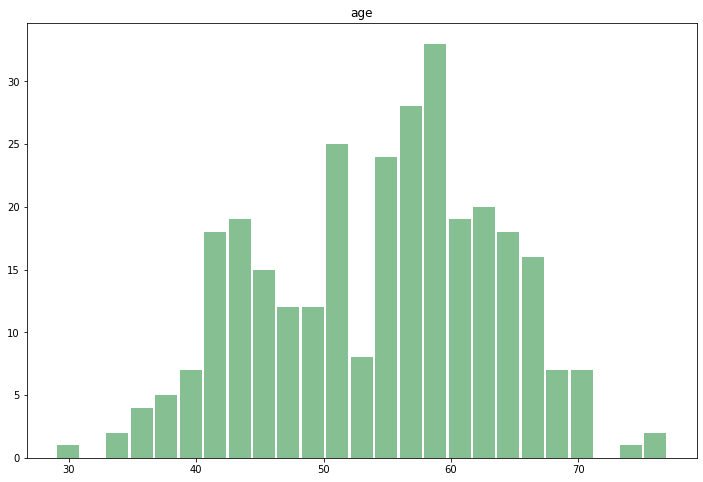

In [175]:
data.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [176]:
#fig = plt.figure(figsize = (15,20))
#ax = fig.gca()
#data.hist(ax = ax)